In [1]:
from main import get_sequence_features, get_encoder, get_positional_features
from torchtext import vocab
import seaborn
import matplotlib.pylab as plt
import torch.nn.functional as F
%matplotlib inline

## 加载词向量预训练模型

In [2]:
from torchtext import vocab
cache_dir = "/home/mnt/rz_mnt/glove"
glove = vocab.GloVe(cache=cache_dir)

## 词向量特性测试

<AxesSubplot: >

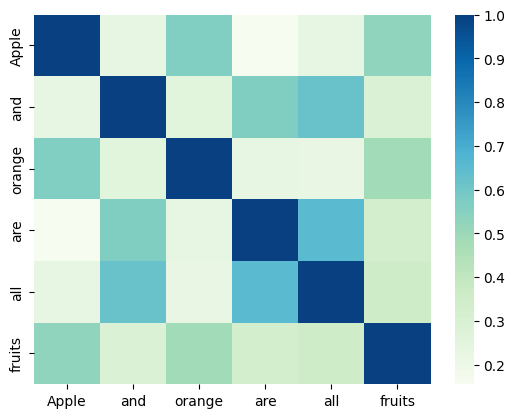

In [3]:
seq = "Apple and orange are all fruits"
seq_features = get_sequence_features(seq, glove)
seq_features_norm = F.normalize(seq_features, dim=-1)
sim_scores = seq_features_norm @ seq_features_norm.transpose(-2, -1)
sim_scores = sim_scores.squeeze().numpy()
words = seq.split(" ")
seaborn.heatmap(sim_scores, cmap='GnBu',
                xticklabels=words, yticklabels=words)

## 获得输入序列的特征并加上位置编码

In [4]:
seq = "Apple and orange are all fruits"
# seq = "The dog is cute the cat is fool"
features = get_sequence_features(seq, glove)
positional_features = get_positional_features(features)
print(f'seq_features_shape:{positional_features.shape}')

seq_features_shape:torch.Size([1, 6, 300])


## 加载Transformer Encoder

In [5]:
head_num = 6
encoder = get_encoder(head_num=head_num, d_model=300, d_ff=600)

## 测试

In [6]:
output_features = encoder(positional_features, mask=None)
print(output_features.shape)

torch.Size([1, 6, 300])


### 注意力图可视化

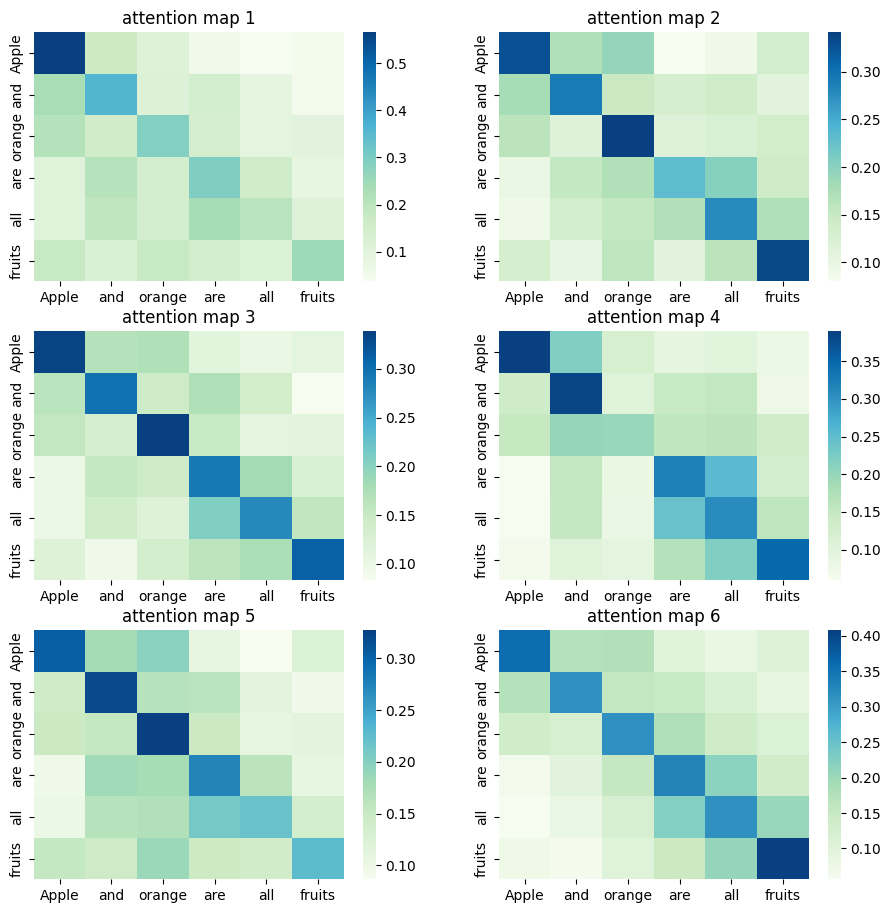

In [7]:
plt.figure(figsize=(11, 11))
words = seq.split(" ")
for i in range(head_num):
    att = encoder.layers[0].self_attn.attn[0, i]
    plt.subplot(3, 2, i+1)
    plt.title(f"attention map {i+1}")
    seaborn.heatmap(att.detach().numpy(), cmap='GnBu',
                    xticklabels=words, yticklabels=words)

<AxesSubplot: >

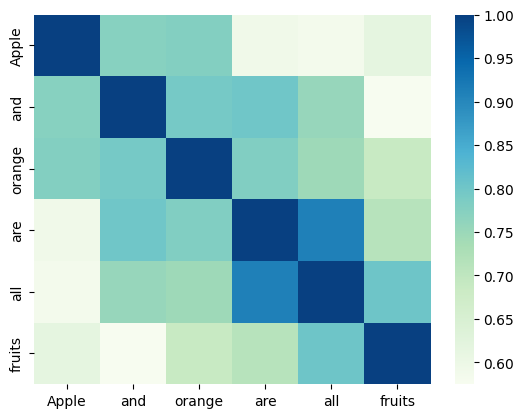

In [8]:
output_features_norm = F.normalize(output_features, dim=-1).squeeze()
sim_scores = output_features_norm @ output_features_norm.transpose(-2, -1)
seaborn.heatmap(sim_scores.detach().numpy(), cmap='GnBu',
                yticklabels=words, xticklabels=words)

In [9]:
output_features.shape

torch.Size([1, 6, 300])